# Telecom Churn Prediction

* [Introduction](#Introduction)
* [Dataset exploration](#Dataset-exploration)
* [Baseline models for churn classification](#Baseline-models-for-churn-classification)
* [Explainig models](#Explainig-models)
* [Uplift models](#Uplift-models)
* [Take out](#Take-out)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [2]:
data = pd.read_csv('data/telecom_churn.csv')

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Introduction

Every company wants to provide best services to their customers. One way to learn how to improve quality of the provide service and satisfie users is to learn why they are leaving the company. Another term for that phenomena is churn rate. In this notebook I will try to understand why certain users are leaving the provider. I'm using kaggle dataset [Customer Churn](https://www.kaggle.com/datasets/barun2104/telecom-churn) for this task. Therefore I will build machine learning models to classify users that are likely to leave. 

If possible I will try to find efficent way to reach out to those users and try to convince them to stay. In other ways I will try to find out what are the most important features that are related to churn. And I will try myself in uplift modelling.

## Dataset exploration

### EDA

Dataset consist of 13 variables and 3333 rows. There are 3 types of variables: categorical, numerical and binary. **Churn** is our target vairiable. It is binary variable with values 0 and 1. 0 means that user is still with the company and 1 means that user has left the company.

There are 2 categorical vairables: Contract Renewal, Data Plan.

The rest of data (10 rows) is numerical.

In [3]:
data.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


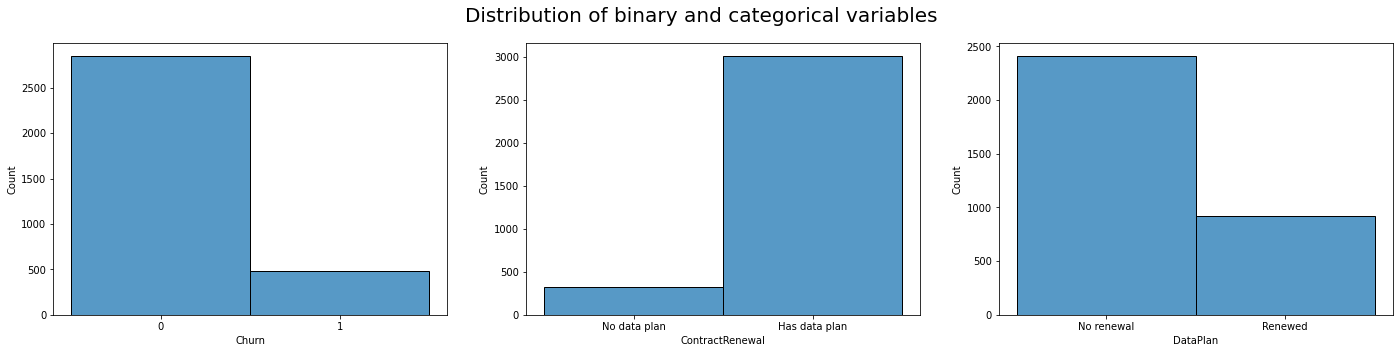

In [4]:
fig, ax = plt.subplots( 1,3, figsize=(24, 5))
plt.suptitle('Distribution of binary and categorical variables', fontsize=20)

sns.histplot(data['Churn'],discrete=True,ax=ax[0])
ax[0].set_xticks([0,1]);

sns.histplot(data['ContractRenewal'],discrete=True, ax=ax[1])
ax[1].set_xticks([0,1],['No data plan','Has data plan']);

sns.histplot(data['DataPlan'],discrete=True, ax=ax[2])
ax[2].set_xticks([0,1],['No renewal','Renewed']);

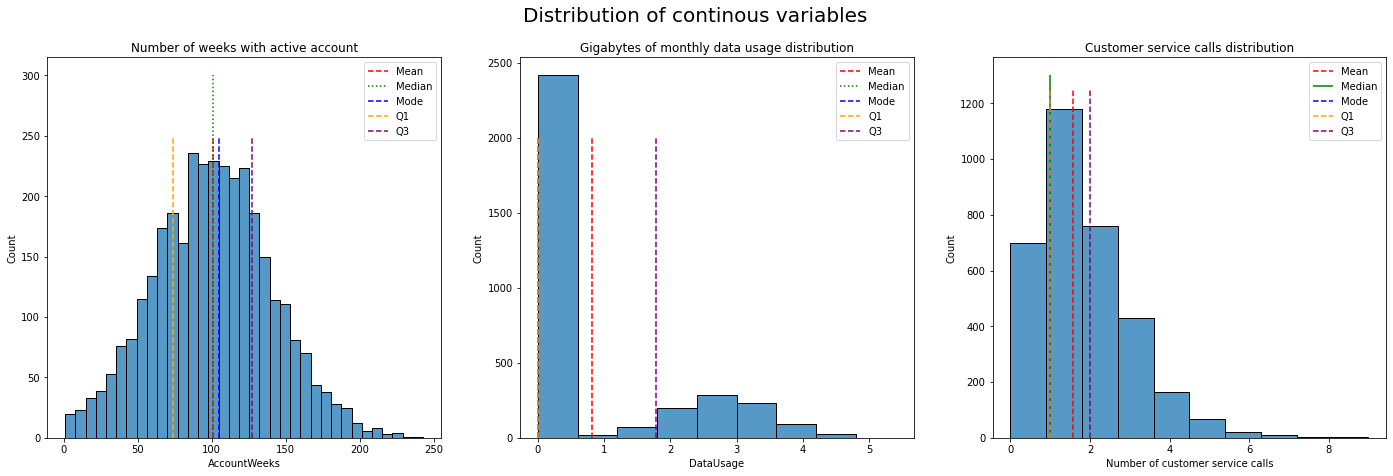

In [17]:
fig, ax = plt.subplots( 1,3, figsize=(24, 7))
plt.suptitle('Distribution of continous variables', fontsize=20)

sns.histplot(data['AccountWeeks'],ax=ax[0])
ax[0].set_title('Number of weeks with active account')
ax[0].vlines(data['AccountWeeks'].mean(),0,250,color='red',label='Mean' , linestyles='dashed')
ax[0].vlines(data['AccountWeeks'].median(),0,300,color='green',label='Median', linestyles='dotted')
ax[0].vlines(data['AccountWeeks'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
ax[0].vlines(data['AccountWeeks'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
ax[0].vlines(data['AccountWeeks'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
ax[0].legend();


sns.histplot(data['DataUsage'],bins=9,ax=ax[1])
ax[1].set_title('Gigabytes of monthly data usage distribution')
ax[1].vlines(data['DataUsage'].mean(),0,2000,color='red',label='Mean' , linestyles='dashed')
ax[1].vlines(data['DataUsage'].median(),0,2000,color='green',label='Median', linestyles='dotted')
ax[1].vlines(data['DataUsage'].mode()[0],0,2000,color='blue',label='Mode', linestyles='dashed')
ax[1].vlines(data['DataUsage'].quantile(0.25),0,2000,color='orange',label='Q1', linestyles='dashed')
ax[1].vlines(data['DataUsage'].quantile(0.75),0,2000,color='purple',label='Q3', linestyles='dashed')
ax[1].legend();


sns.histplot(data['CustServCalls'],bins=10, ax = ax[2])
ax[2].set_title('Customer service calls distribution')
ax[2].vlines(data['CustServCalls'].mean(),0,1250,color='red',label='Mean' , linestyles='dashed')
ax[2].vlines(data['CustServCalls'].median(),0,1300,color='green',label='Median', linestyles='solid')
ax[2].vlines(data['CustServCalls'].mode()[0],0,1250,color='blue',label='Mode', linestyles='dashed')
ax[2].vlines(data['CustServCalls'].quantile(0.25),0,1250,color='orange',label='Q1', linestyles='dashed')
ax[2].vlines(data['CustServCalls'].quantile(0.75),0,1250,color='purple',label='Q3', linestyles='dashed')
ax[2].set_xlabel('Number of customer service calls')
ax[2].legend();

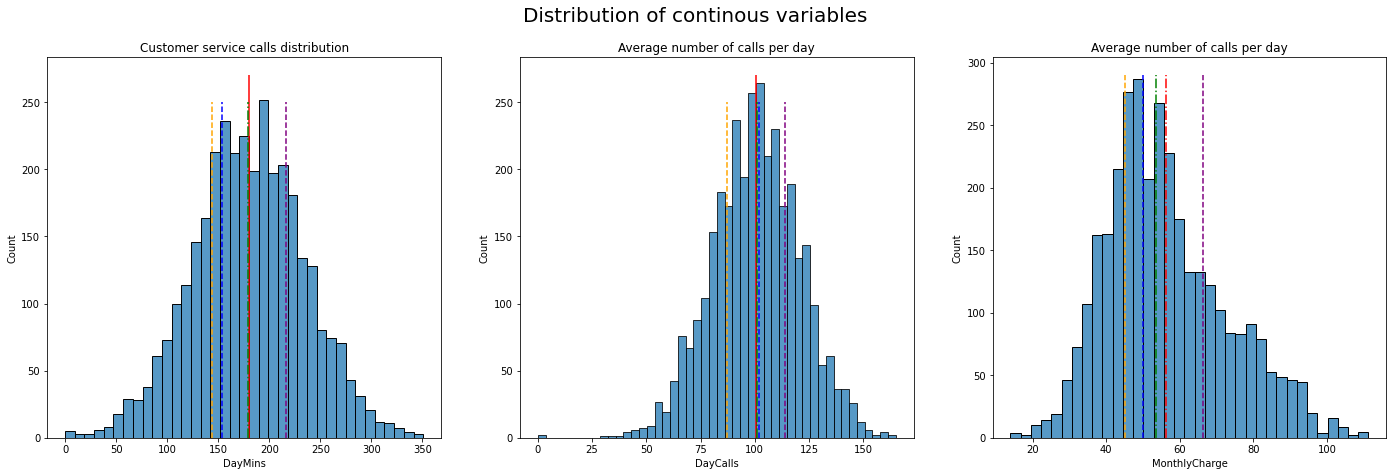

In [18]:
fig, ax = plt.subplots( 1,3, figsize=(24, 7))
plt.suptitle('Distribution of continous variables', fontsize=20)

sns.histplot(data['DayMins'], ax=ax[0])
ax[0].set_title('Customer service calls distribution')
ax[0].vlines(data['DayMins'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
ax[0].vlines(data['DayMins'].median(),0,250,color='green',label='Median', linestyles='dashdot')
ax[0].vlines(data['DayMins'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
ax[0].vlines(data['DayMins'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
ax[0].vlines(data['DayMins'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
ax[0].legend();

sns.histplot(data['DayCalls'], ax=ax[1]);
ax[1].set_title('Average number of calls per day')
ax[1].vlines(data['DayCalls'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
ax[1].vlines(data['DayCalls'].median(),0,250,color='green',label='Median', linestyles='dashdot')
ax[1].vlines(data['DayCalls'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
ax[1].vlines(data['DayCalls'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
ax[1].vlines(data['DayCalls'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
ax[1].legend();

sns.histplot(data['MonthlyCharge'], ax=ax[2]);
ax[2].set_title('Average number of calls per day')
ax[2].vlines(data['MonthlyCharge'].mean(),0,290,color='red',label='Mean' , linestyles='dashdot')
ax[2].vlines(data['MonthlyCharge'].median(),0,290,color='green',label='Median', linestyles='dashdot')
ax[2].vlines(data['MonthlyCharge'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
ax[2].vlines(data['MonthlyCharge'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
ax[2].vlines(data['MonthlyCharge'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
ax[2].legend();

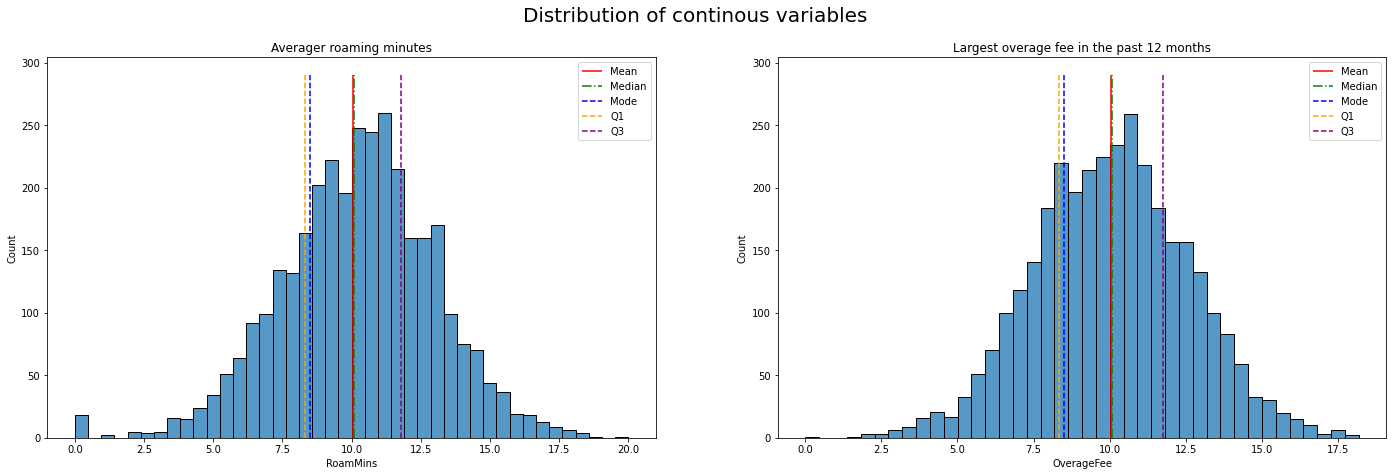

In [20]:
fig, ax = plt.subplots( 1,2, figsize=(24, 7))
plt.suptitle('Distribution of continous variables', fontsize=20)

sns.histplot(data['RoamMins'], ax = ax[0]);
ax[0].set_title('Averager roaming minutes')
ax[0].vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
ax[0].vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
ax[0].vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
ax[0].vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
ax[0].vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
ax[0].legend();


sns.histplot(data['OverageFee'], ax = ax[1]);
ax[1].set_title('Largest overage fee in the past 12 months')
ax[1].vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
ax[1].vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
ax[1].vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
ax[1].vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
ax[1].vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
ax[1].legend();

### Relationships

## Baseline models for churn classification

### Baseline models

### Tsne models

## Explainig models

## Uplift models

## Take out